## Package Install

In [ ]:
# pip install spacy
# python -m spacy download en_core_web_sm
# pip install beautifulsoup4
# pip install textblob
# pip install mlxtend
# pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

# Let's Get Started

### Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

In [2]:
df = pd.read_csv('https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/master/IMDB-Dataset.csv')

In [4]:
df.shape

(50000, 2)

In [5]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Preprocessing

In [8]:
df['word_counts'] = df['review'].apply(lambda x: ps.get_wordcounts(x))
df['char_counts'] = df['review'].apply(lambda x: ps.get_charcounts(x))
df['avg_wordlength'] = df['review'].apply(lambda x: ps.get_avg_wordlength(x))
df['stopwords_counts'] = df['review'].apply(lambda x: ps.get_stopwords_counts(x))

df['review'] = df['review'].apply(lambda x: ps.remove_html_tags(x))
df['review'] = df['review'].str.lower()

C:\Users\laxmi\anaconda3\lib\site-packages\preprocess_kgptalkie\utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [9]:
df['review_without_stopwords'] = df['review'].apply(lambda x: ps.remove_stopwords(x))

In [10]:
df.head()

,review,sentiment,word_counts,char_counts,avg_wordlength,stopwords_counts,review_without_stopwords
0,one of the other reviewers has mentioned that ...,positive,307,1455,4.739414,135,reviewers mentioned watching 1 oz episode you'...
1,a wonderful little production. the filming tec...,positive,162,837,5.166667,71,wonderful little production. filming technique...
2,i thought this was a wonderful way to spend ti...,positive,166,761,4.584337,81,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,negative,138,611,4.427536,63,basically there's family little boy (jake) thi...
4,"petter mattei's ""love in the time of money"" is...",positive,230,1088,4.730435,107,"petter mattei's ""love time money"" visually stu..."


**STOP WORDS**
```
{'call', 'upon', 'still', 'nevertheless', 'down', 'every', 'forty', '‘re', 'always', 'whole', 'side', "n't", 'now', 'however', 'an', 'show', 'least', 'give', 'below', 'did', 'sometimes', 'which', "'s", 'nowhere', 'per', 'hereupon', 'yours', 'she', 'moreover', 'eight', 'somewhere', 'within', 'whereby', 'few', 'has', 'so', 'have', 'for', 'noone', 'top', 'were', 'those', 'thence', 'eleven', 'after', 'no', '’ll', 'others', 'ourselves', 'themselves', 'though', 'that', 'nor', 'just', '’s', 'before', 'had', 'toward', 'another', 'should', 'herself', 'and', 'these', 'such', 'elsewhere', 'further', 'next', 'indeed', 'bottom', 'anyone', 'his', 'each', 'then', 'both', 'became', 'third', 'whom', '‘ve', 'mine', 'take', 'many', 'anywhere', 'to', 'well', 'thereafter', 'besides', 'almost', 'front', 'fifteen', 'towards', 'none', 'be', 'herein', 'two', 'using', 'whatever', 'please', 'perhaps', 'full', 'ca', 'we', 'latterly', 'here', 'therefore', 'us', 'how', 'was', 'made', 'the', 'or', 'may', '’re', 'namely', "'ve", 'anyway', 'amongst', 'used', 'ever', 'of', 'there', 'than', 'why', 'really', 'whither', 'in', 'only', 'wherein', 'last', 'under', 'own', 'therein', 'go', 'seems', '‘m', 'wherever', 'either', 'someone', 'up', 'doing', 'on', 'rather', 'ours', 'again', 'same', 'over', '‘s', 'latter', 'during', 'done', "'re", 'put', "'m", 'much', 'neither', 'among', 'seemed', 'into', 'once', 'my', 'otherwise', 'part', 'everywhere', 'never', 'myself', 'must', 'will', 'am', 'can', 'else', 'although', 'as', 'beyond', 'are', 'too', 'becomes', 'does', 'a', 'everyone', 'but', 'some', 'regarding', '‘ll', 'against', 'throughout', 'yourselves', 'him', "'d", 'it', 'himself', 'whether', 'move', '’m', 'hereafter', 're', 'while', 'whoever', 'your', 'first', 'amount', 'twelve', 'serious', 'other', 'any', 'off', 'seeming', 'four', 'itself', 'nothing', 'beforehand', 'make', 'out', 'very', 'already', 'various', 'until', 'hers', 'they', 'not', 'them', 'where', 'would', 'since', 'everything', 'at', 'together', 'yet', 'more', 'six', 'back', 'with', 'thereupon', 'becoming', 'around', 'due', 'keep', 'somehow', 'n‘t', 'across', 'all', 'when', 'i', 'empty', 'nine', 'five', 'get', 'see', 'been', 'name', 'between', 'hence', 'ten', 'several', 'from', 'whereupon', 'through', 'hereby', "'ll", 'alone', 'something', 'formerly', 'without', 'above', 'onto', 'except', 'enough', 'become', 'behind', '’d', 'its', 'most', 'n’t', 'might', 'whereas', 'anything', 'if', 'her', 'via', 'fifty', 'is', 'thereby', 'twenty', 'often', 'whereafter', 'their', 'also', 'anyhow', 'cannot', 'our', 'could', 'because', 'who', 'beside', 'by', 'whence', 'being', 'meanwhile', 'this', 'afterwards', 'whenever', 'mostly', 'what', 'one', 'nobody', 'seem', 'less', 'do', '‘d', 'say', 'thus', 'unless', 'along', 'yourself', 'former', 'thru', 'he', 'hundred', 'three', 'sixty', 'me', 'sometime', 'whose', 'you', 'quite', '’ve', 'about', 'even'}
```

In [12]:
df.columns

Index(['review', 'sentiment', 'word_counts', 'char_counts', 'avg_wordlength',
       'stopwords_counts', 'review_without_stopwords'],
      dtype='object')

In [11]:
import seaborn as sns

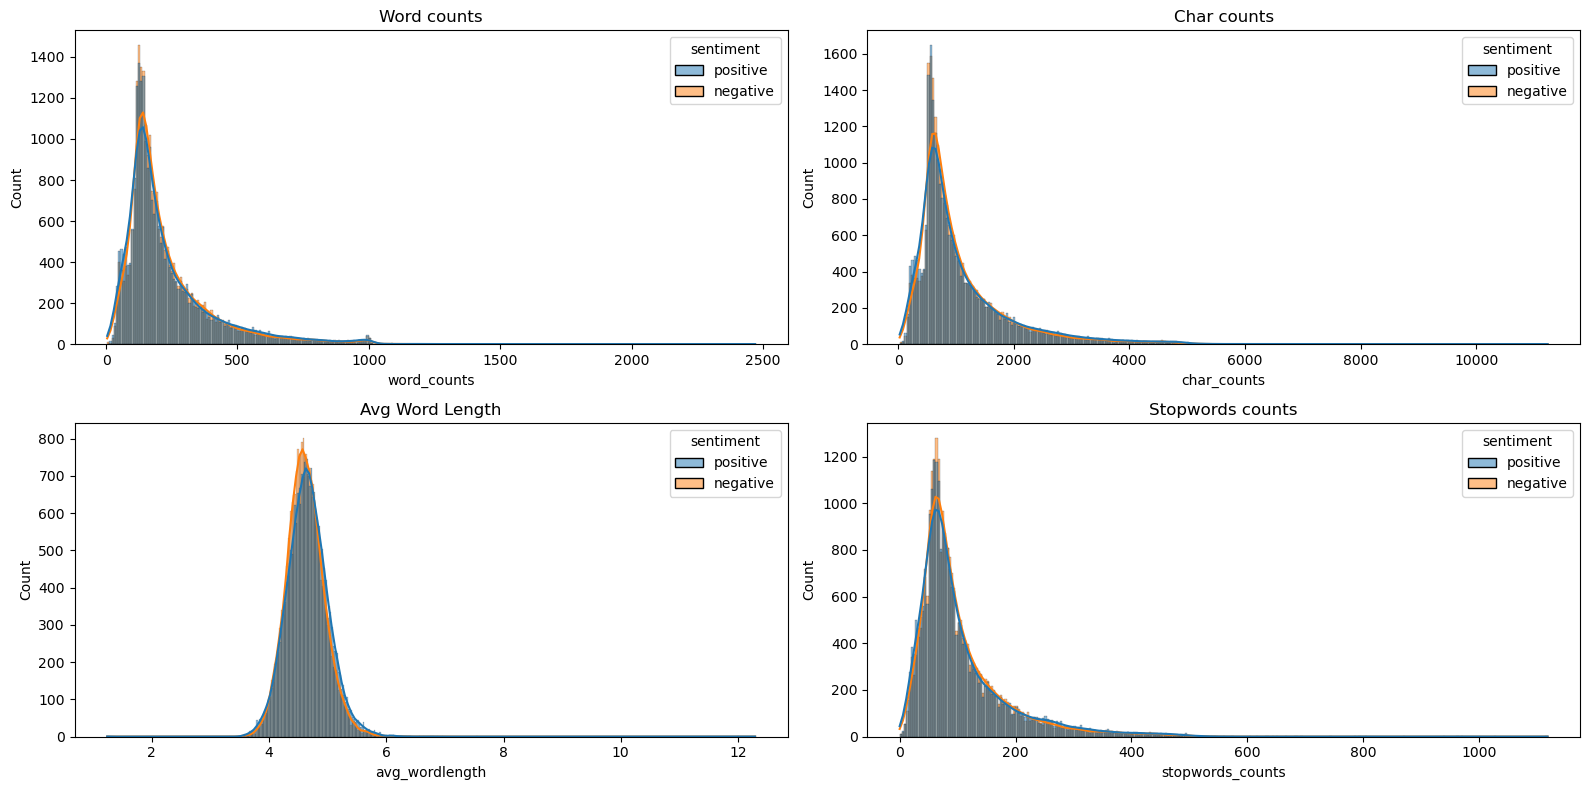

In [17]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
# sns.barplot(x='sentiment', y='word_counts', data=df)
sns.histplot(data=df, x='word_counts', hue='sentiment', kde=True)
plt.title('Word counts')

plt.subplot(2,2,2)
sns.histplot(data=df, x='char_counts', hue='sentiment', kde=True)
plt.title('Char counts')

plt.subplot(2,2,3)
sns.histplot(data=df, x='avg_wordlength', hue='sentiment', kde=True)
plt.title('Avg Word Length')

plt.subplot(2,2,4)
sns.histplot(data=df, x='stopwords_counts', hue='sentiment', kde=True)
plt.title('Stopwords counts')

plt.tight_layout()
plt.show()


### Model Building and Word Embedding

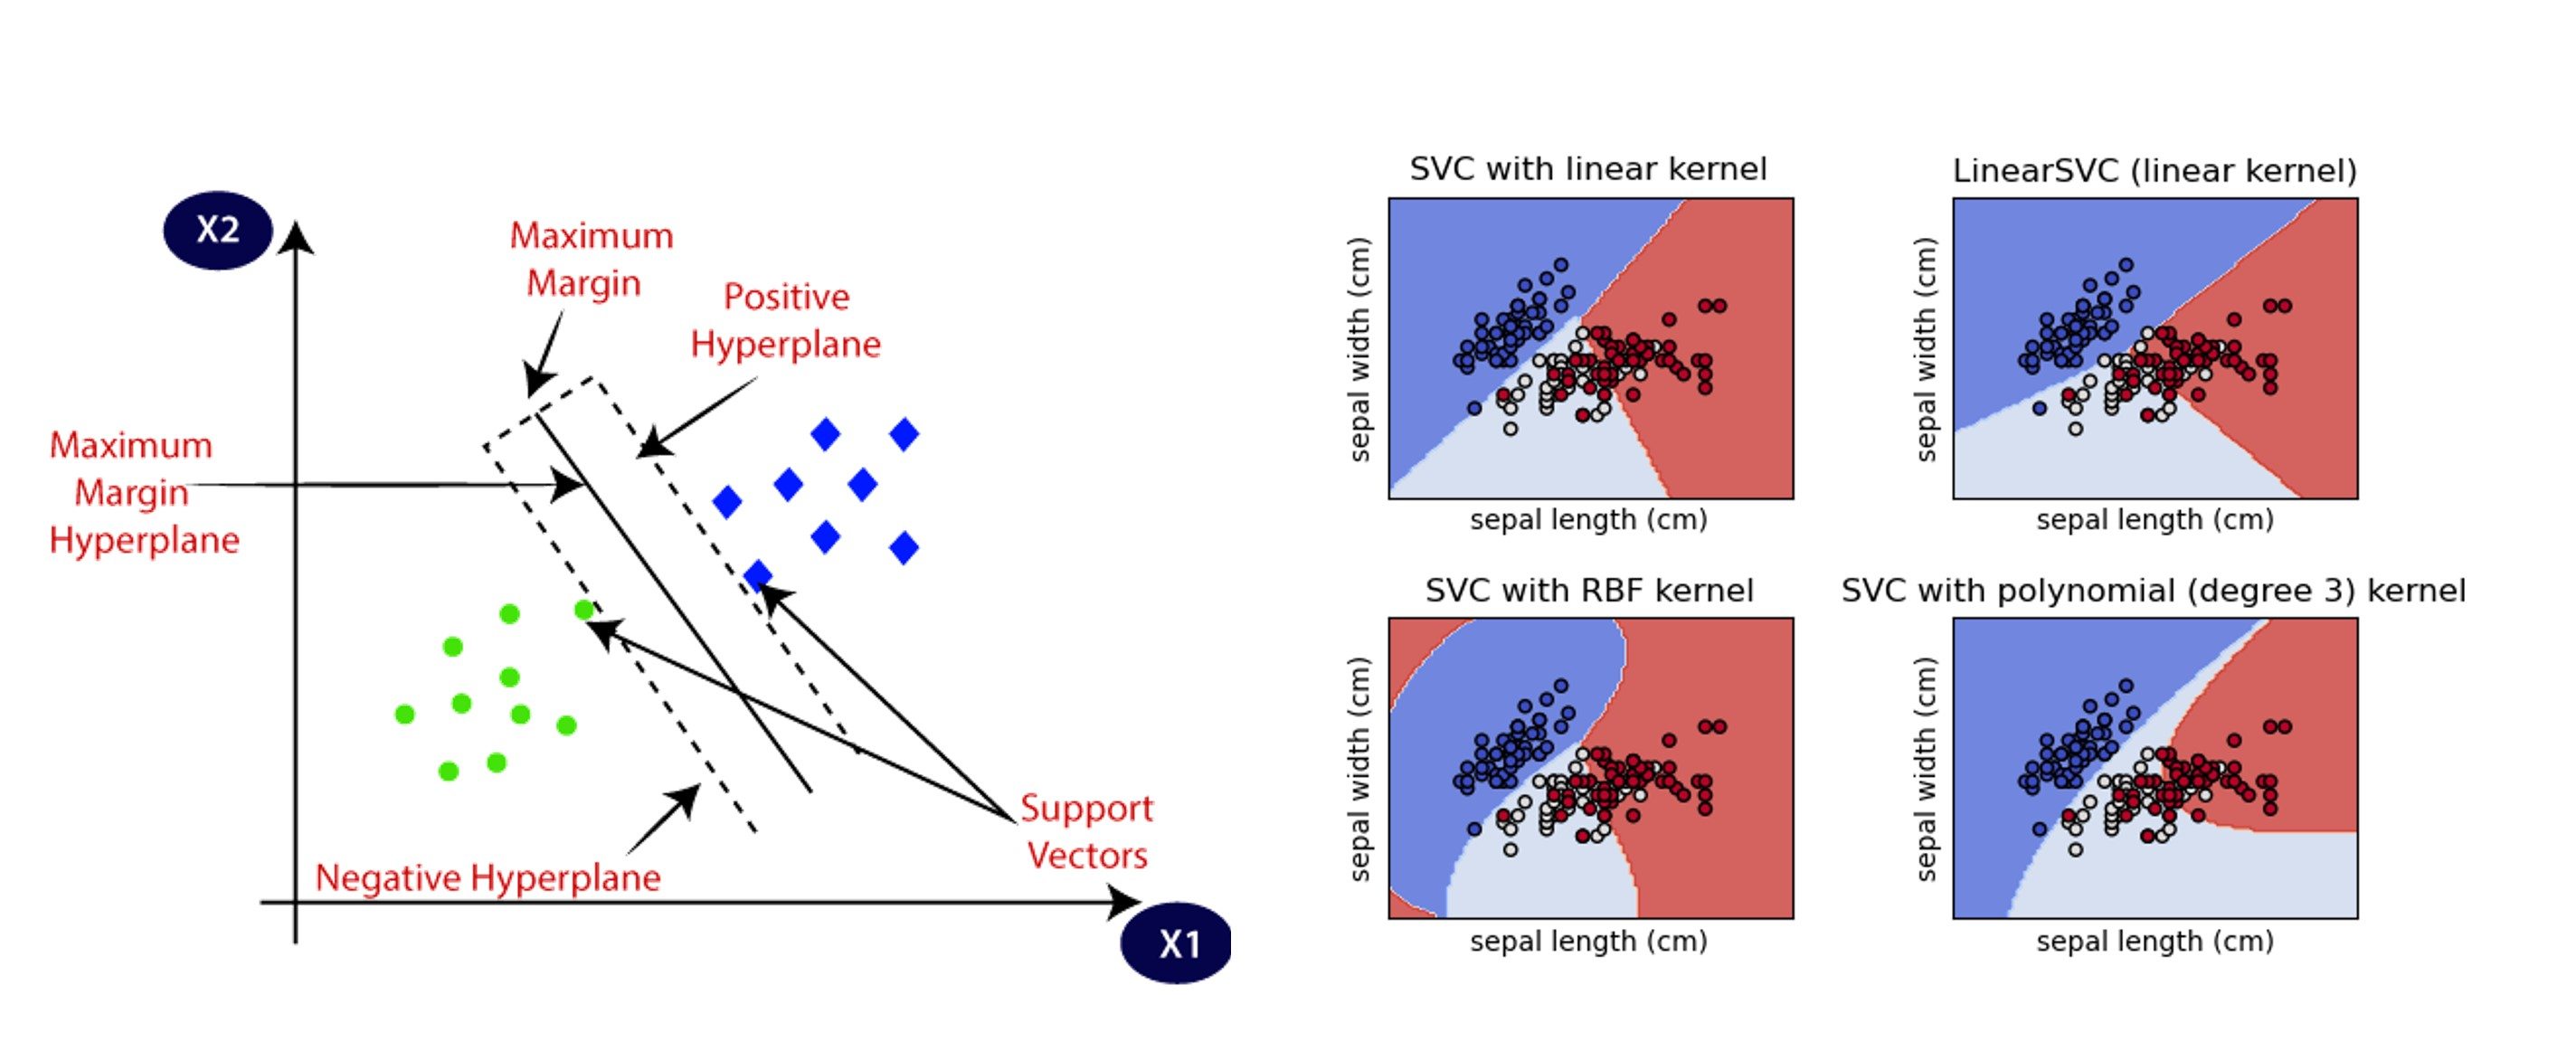

### Support Vector Machine (SVM)
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems.
- In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well

#### Advantages
- SVM works relatively well when there is clear margin of separation between classes
- SVM is more effective in high dimensional spaces.
- SVM is effective in cases where number of dimensions is greater than the number of samples.
- SVM is relatively memory efficient

#### Disadvantages
- SVM algorithm is not suitable for large data sets.
- SVM does not perform very well, when the data set has more noise i.e. target classes are overlapping.
- It is memory intensive. It requires a lot of memory for training the model.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
# steps
# train test split -> tfidf -> ml algo -> fit -> prediction -> evaluation

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], 
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=df['sentiment']
                                                   )

In [20]:
X_train.shape, X_test.shape

((40000,), (10000,))

In [21]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [22]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [25]:
y_pred = clf.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

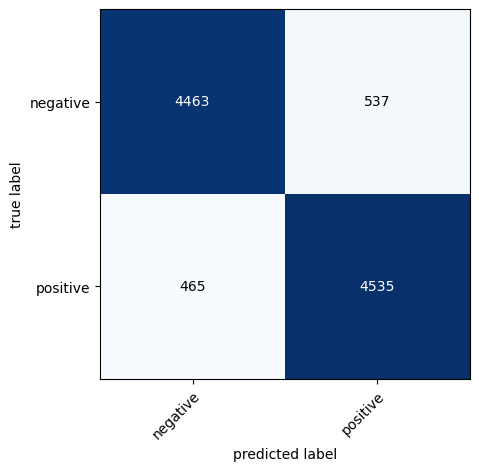

In [28]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [29]:
clf.predict(['Wow, this is amazing lesson'])

array(['positive'], dtype=object)

In [30]:
clf.predict(['Wow, this sucks'])

array(['negative'], dtype=object)

In [31]:
clf.predict(['please like this video. it helps me a lot'])

array(['positive'], dtype=object)

In [32]:
import pickle

pickle.dump(clf, open('sentiment_analysis.pkl', 'wb'))